<a href="https://colab.research.google.com/github/hamegg320/MMEs/blob/main/surface_temperature_MME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Google Driveに接続させる
from google.colab import drive
drive.mount('/content/drive')

# 作業ディレクトリを移動する　→　そのディレクトリでデータを保存できる
%cd /content/drive/MyDrive/nozue_version/surface_temperature_model/

Mounted at /content/drive
/content/drive/MyDrive/nozue_version/surface_temperature_model


In [3]:
# 作業領域を確認する
%ls

ts_Amon_BCC-ESM1_historical_r1i1p1f1_gn_185001-201412.nc
ts_Amon_CanESM5-1_historical_r1i1p1f1_gn_185001-201412.nc
ts_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc
ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_185001-194912.nc
ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_195001-201412.nc
ts_Amon_IPSL-CM6A-LR-INCA_historical_r1i1p1f1_gr_185001-201412.nc
ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-194912.nc
ts_Amon_MIROC6_historical_r1i1p1f1_gn_195001-201412.nc


In [4]:
pip install netCDF4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.7 MB/s eta 0:00:00


###地表面温度の変化(1850-2014)

filenames, ['ts_Amon_BCC-ESM1_historical_r1i1p1f1_gn_185001-201412.nc', 'ts_Amon_CanESM5-1_historical_r1i1p1f1_gn_185001-201412.nc', 'ts_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc', 'ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_185001-194912.nc', 'ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_195001-201412.nc', 'ts_Amon_IPSL-CM6A-LR-INCA_historical_r1i1p1f1_gr_185001-201412.nc', 'ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-194912.nc', 'ts_Amon_MIROC6_historical_r1i1p1f1_gn_195001-201412.nc']
BCC-ESM1	CanESM5-1	CanESM5	INM-CM5-0	INM-CM5-0	IPSL-CM6A-LR-INCA	MIROC6	MIROC6	
model_dict, {'BCC-ESM1': ['ts_Amon_BCC-ESM1_historical_r1i1p1f1_gn_185001-201412.nc'], 'CanESM5-1': ['ts_Amon_CanESM5-1_historical_r1i1p1f1_gn_185001-201412.nc'], 'CanESM5': ['ts_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc'], 'INM-CM5-0': ['ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_185001-194912.nc', 'ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_195001-201412.nc'], 'IPSL-CM6A-LR-INCA': ['ts_Amon_IPSL-CM6A-LR-I

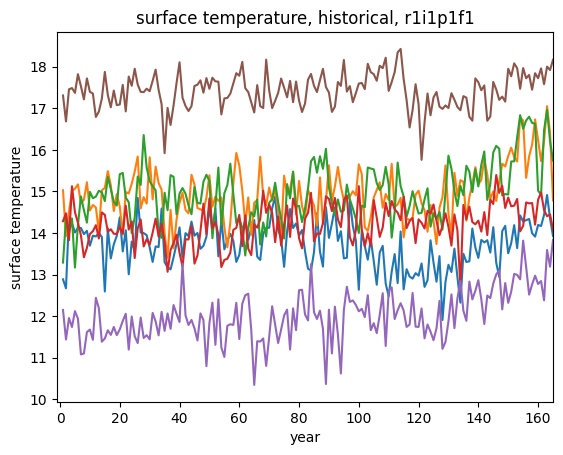

In [6]:
### Import modules
import os
import csv
import math
from netCDF4 import Dataset
import matplotlib.pyplot as plt

### Store file names by model names into directory
model_dict = {}
filenames = sorted(os.listdir()) #場所をcdでseaice_modelにしているからその中のデータを並び替えている。年代順・アンサンブル順にも
print("filenames,", filenames)

##########################アンサンブルを揃えたマルチモデルの場合の変更点###############################
for filename in filenames:
  ensemble="r1i1p1f1" #指定するアンサンブル
  
  if filename.split('_')[4] in ensemble:
    model_name = filename.split('_')[2] #並び替えた文字列をsplitで_の2個目で分割　例)siextentn_SImon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc
    
    print(model_name, end = '\t')
    
    if model_name not in model_dict:    #並び替えた文字列がディクショナリにない場合
      model_dict[model_name] = [filename] #分割されたモデルもいれることができる。keyに対してvalueは複数可能
    else:
      model_dict[model_name].append(filename) #ディクショナリのキーに2個目で分割した文字列を入れる。

print("")
print("model_dict,",model_dict)

############################################################################

### Plot average of sea ice extent every model
# store sea ice extent throughout all the years by models
for model_name, files in model_dict.items(): #ディレクトリ内をループのため、itms method
  sum_surface = []

  for file in files: #ディクショナリのvalueの部分がfileになっているため
    #print(file) データは分かれている。

    ds = Dataset(file, mode='r',format="NETCDF4")
    run_time = len(ds['time']) #timeのもの
    lat = ds['lat'][:]
    lon=  ds['lon'][:]

##################追加コード########################
    ###東京の場合　北緯36度、東経140度
    ###東京の場合　北緯36度、東経140度
    point_lat_st=35.7 #陸地の範囲
    point_lat_gl=37.8
    point_lat=36
    point_lon_st=138.8
    point_lon_gl=140.68
    point_lon=140

    #point_lon=point_lon+180
    new_lat=0
    new_lon=0
    count_lat=0
    count_lon=0

    
    for y in range(len(lat)):
      if  lat[y] >= (point_lat_st) and lat[y] <= (point_lat_gl):
          count_lat+=1
          #print(lat[y])
          if count_lat > 1:
            if (point_lat - lat[y])**2 > (point_lat - lat[new_lat])**2 :
              new_lat=new_lat     
            else:
              new_lat=y
          else:
            new_lat=y    

    print(count_lat)
    print(lat[new_lat],"!") #北緯35.492958

    for x in range(len(lon)):
      if  lon[x] >= (point_lon_st) and lon[x] <= (point_lon_gl):    #print(lat[y])
          count_lon+=1
          if count_lon >1:
            if (point_lon - lon[x])**2 > (point_lon - lat[new_lon])**2 :
              new_lon=new_lon
            else:
              new_lon=x
          else:
            new_lon=x

    print(count_lon)
    print(lon[new_lon],"!")   
        
    for i in range(run_time):
      if len(ds['ts'].dimensions) > 1: #dsのdimensionが1つ以上
        sum_surface.append(ds["ts"][i][new_lat][new_lon]-273.15)
      else:
        sum_surface.append(ds['ts'][i])
##################################################

  #lists & variables
  temperature_map = []
  year_map = []
  count = 0
  sum = 0
  ave = 0
    
  # calculate average of sea ice extent every year
  for i in range(len(sum_surface)):
    sum += sum_surface[i]
    count += 1
    
    if count % 12 == 0:
      ave = sum / 12
      temperature_map.append(ave)
      sum = 0
    
  for i in range(len(temperature_map)):
    year_map.append(i+1)

  #plt.figure(figsize=(6, 6)
  plt.plot(year_map,temperature_map)
#plt.ylim(9.0,15.5)
plt.xlim(-1,165)
plt.ylabel('surface temperature')
plt.title(f'surface temperature, historical, {ensemble}') 
plt.xlabel('year')
plt.show()   

filenames, ['ts_Amon_BCC-ESM1_historical_r1i1p1f1_gn_185001-201412.nc', 'ts_Amon_CanESM5-1_historical_r1i1p1f1_gn_185001-201412.nc', 'ts_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc', 'ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_185001-194912.nc', 'ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_195001-201412.nc', 'ts_Amon_IPSL-CM6A-LR-INCA_historical_r1i1p1f1_gr_185001-201412.nc', 'ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-194912.nc', 'ts_Amon_MIROC6_historical_r1i1p1f1_gn_195001-201412.nc']
BCC-ESM1	CanESM5-1	CanESM5	INM-CM5-0	INM-CM5-0	IPSL-CM6A-LR-INCA	MIROC6	MIROC6	
model_dict, {'BCC-ESM1': ['ts_Amon_BCC-ESM1_historical_r1i1p1f1_gn_185001-201412.nc'], 'CanESM5-1': ['ts_Amon_CanESM5-1_historical_r1i1p1f1_gn_185001-201412.nc'], 'CanESM5': ['ts_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc'], 'INM-CM5-0': ['ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_185001-194912.nc', 'ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_195001-201412.nc'], 'IPSL-CM6A-LR-INCA': ['ts_Amon_IPSL-CM6A-LR-I

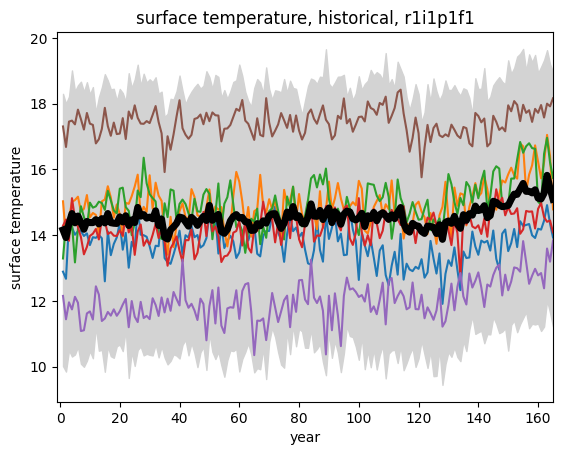

In [7]:
### Import modules
import os
import csv
import math
from netCDF4 import Dataset
import matplotlib.pyplot as plt

### Store file names by model names into directory
model_dict = {}
filenames = sorted(os.listdir()) #場所をcdでseaice_modelにしているからその中のデータを並び替えている。年代順・アンサンブル順にも
print("filenames,", filenames)

##########################アンサンブルを揃えたマルチモデルの場合の変更点###############################
for filename in filenames:
  ensemble="r1i1p1f1" #指定するアンサンブル
  
  if filename.split('_')[4] in ensemble:
    model_name = filename.split('_')[2] #並び替えた文字列をsplitで_の2個目で分割　例)siextentn_SImon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc
    
    print(model_name, end = '\t')
    
    if model_name not in model_dict:    #並び替えた文字列がディクショナリにない場合
      model_dict[model_name] = [filename] #分割されたモデルもいれることができる。keyに対してvalueは複数可能
    else:
      model_dict[model_name].append(filename) #ディクショナリのキーに2個目で分割した文字列を入れる。

print("")
print("model_dict,",model_dict)

############################################################################

### Plot average of sea ice extent every model
counter=0
MMA_ts=[]
# store sea ice extent throughout all the years by models
for model_name, files in model_dict.items(): #ディレクトリ内をループのため、itms method
  sum_surface = []

  for file in files: #ディクショナリのvalueの部分がfileになっているため
    #print(file) データは分かれている。

    ds = Dataset(file, mode='r',format="NETCDF4")
    run_time = len(ds['time']) #timeのもの
    lat = ds['lat'][:]
    lon=  ds['lon'][:]

##################追加コード########################
    ###東京の場合　北緯36度、東経140度
    point_lat_st=35.7 #陸地の範囲
    point_lat_gl=37.8
    point_lat=36
    point_lon_st=138.8
    point_lon_gl=140.68
    point_lon=140

    #point_lon=point_lon+180
    new_lat=0
    new_lon=0
    count_lat=0
    count_lon=0

    
    for y in range(len(lat)):
      if  lat[y] >= (point_lat_st) and lat[y] <= (point_lat_gl):
          count_lat+=1
          #print(lat[y])
          if count_lat > 1:
            if (point_lat - lat[y])**2 > (point_lat - lat[new_lat])**2 :
              new_lat=new_lat     
            else:
              new_lat=y
          else:
            new_lat=y    

    print(count_lat)
    print(lat[new_lat],"!") #北緯35.492958

    for x in range(len(lon)):
      if  lon[x] >= (point_lon_st) and lon[x] <= (point_lon_gl):    #print(lat[y])
          count_lon+=1
          if count_lon >1:
            if (point_lon - lon[x])**2 > (point_lon - lat[new_lon])**2 :
              new_lon=new_lon
            else:
              new_lon=x
          else:
            new_lon=x

    print(count_lon)
    print(lon[new_lon],"!")   
        
    for i in range(run_time):
      if len(ds['ts'].dimensions) > 1: #dsのdimensionが1つ以上
        sum_surface.append(ds["ts"][i][new_lat][new_lon]-273.15)
        MMA_ts.append(ds['ts'][i][new_lat][new_lon]-273.15)
      else:
        sum_surface.append(ds['ts'][i])
        MMA_ts.append(ds['ts'][i]-273.15)
##################################################
  
  counter+=1 #モデルの数を数える
  #lists & variables
  temperature_map = []
  year_map = []
  count = 0
  sum = 0
  ave = 0
    
  # calculate average of sea ice extent every year
  for i in range(len(sum_surface)):
    sum += sum_surface[i]
    count += 1
    
    if count % 12 == 0:
      ave = sum / 12
      temperature_map.append(ave)
      sum = 0
    
  for i in range(len(temperature_map)):
    year_map.append(i+1)

  #plt.figure(figsize=(6, 6)
  plt.plot(year_map,temperature_map)

###################### average ######################
MMA_map = []
SL_1_map = []
SL_2_map = []
year_map = []
count = 0
sum = 0
ave = 0
#MMA_increase=0
mon_average=[]
result=0
fif_ave=0
dispersion=0
SD=0
SL_1=[]
SL_2=[]
#SL_1_increase=0
#SL_2_increase=0


for i in range(1980):
   for x in range(counter):
   #MMA_siextenth[0+1980*0]+MMA_siextenth[0+1980*1]+MMA_siextenth[0+1980+1980] 
     result += MMA_ts[i+1980*x]
   
   mon_average.append(result/counter)
   result=0

   for x in range(counter):
     dispersion += (mon_average[i] - MMA_ts[i+1980*x])**2
     
   SD = math.sqrt(dispersion/counter)
   #print(dispersion)

   SL_1.append(mon_average[i] + (SD*2))
   SL_2.append(mon_average[i] - (SD*2))
   dispersion=0


#######平均のグラフ#############
# calculate average of sea ice extent every year
for i in range(len(mon_average)):
  sum += mon_average[i]
  count += 1
    
  if count % 12 == 0:
    ave = sum / 12
    MMA_map.append(ave)
    sum = 0
    
########有意水準+のグラフ########

for i in range(len(mon_average)):
  sum += SL_1[i]
  count += 1
    
  if count % 12 == 0:
    ave = sum / 12
    SL_1_map.append(ave)
    sum = 0

########有意水準-のグラフ########

for i in range(len(mon_average)):
  sum += SL_2[i]
  count += 1
    
  if count % 12 == 0:
    ave = sum / 12
    SL_2_map.append(ave)
    sum = 0

for i in range(len(SL_1_map)):
  year_map.append(i+1)

plt.plot(year_map,MMA_map, linewidth=5,color= 'black')
plt.fill_between(year_map, SL_1_map, SL_2_map, color="lightgray")
#plt.ylim(9.0,15.5)
plt.xlim(-1,165)
plt.ylabel('surface temperature')
plt.title(f'surface temperature, historical, {ensemble}') 
plt.xlabel('year')
plt.show()  

###地表面温度の上昇量(1850-2014)


filenames, ['ts_Amon_BCC-ESM1_historical_r1i1p1f1_gn_185001-201412.nc', 'ts_Amon_CanESM5-1_historical_r1i1p1f1_gn_185001-201412.nc', 'ts_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc', 'ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_185001-194912.nc', 'ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_195001-201412.nc', 'ts_Amon_IPSL-CM6A-LR-INCA_historical_r1i1p1f1_gr_185001-201412.nc', 'ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-194912.nc', 'ts_Amon_MIROC6_historical_r1i1p1f1_gn_195001-201412.nc']
BCC-ESM1	CanESM5-1	CanESM5	INM-CM5-0	INM-CM5-0	IPSL-CM6A-LR-INCA	MIROC6	MIROC6	
model_dict, {'BCC-ESM1': ['ts_Amon_BCC-ESM1_historical_r1i1p1f1_gn_185001-201412.nc'], 'CanESM5-1': ['ts_Amon_CanESM5-1_historical_r1i1p1f1_gn_185001-201412.nc'], 'CanESM5': ['ts_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc'], 'INM-CM5-0': ['ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_185001-194912.nc', 'ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_195001-201412.nc'], 'IPSL-CM6A-LR-INCA': ['ts_Amon_IPSL-CM6A-LR-I

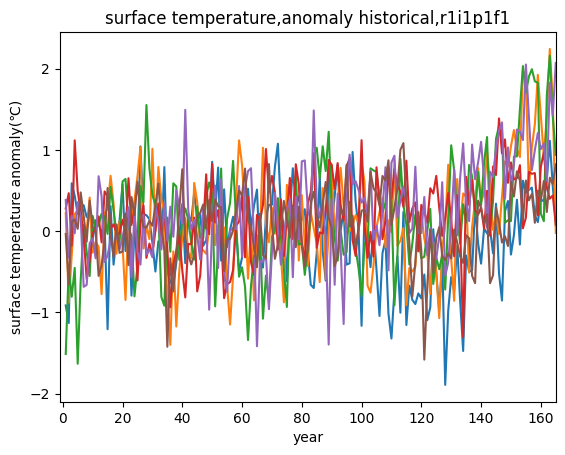

In [9]:
### Import modules
import os
import csv
import math
from netCDF4 import Dataset
import matplotlib.pyplot as plt

### Store file names by model names into directory
model_dict = {}
filenames = sorted(os.listdir()) #場所をcdでseaice_modelにしているからその中のデータを並び替えている。年代順・アンサンブル順にも
print("filenames,", filenames)

##########################アンサンブルを揃えたマルチモデルの場合の変更点###############################
for filename in filenames:
  ensemble="r1i1p1f1" #指定するアンサンブル
  
  if filename.split('_')[4] in ensemble:
    model_name = filename.split('_')[2] #並び替えた文字列をsplitで_の2個目で分割　例)siextentn_SImon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc
    
    print(model_name, end = '\t')
    
    if model_name not in model_dict:    #並び替えた文字列がディクショナリにない場合
      model_dict[model_name] = [filename] #分割されたモデルもいれることができる。keyに対してvalueは複数可能
    else:
      model_dict[model_name].append(filename) #ディクショナリのキーに2個目で分割した文字列を入れる。

print("")
print("model_dict,",model_dict)

############################################################################

### Plot average of sea ice extent every model
# store sea ice extent throughout all the years by models
for model_name, files in model_dict.items(): #ディレクトリ内をループのため、itms method
  sum_surface = []

  for file in files: #ディクショナリのvalueの部分がfileになっているため
    #print(file) データは分かれている。

    ds = Dataset(file, mode='r',format="NETCDF4")
    run_time = len(ds['time']) #timeのもの
    lat = ds['lat'][:]
    lon=  ds['lon'][:]

##################追加コード########################
    ###東京の場合　北緯36度、東経140度
    point_lat_st=35.7 #陸地の範囲
    point_lat_gl=37.8
    point_lat=36
    point_lon_st=138.8
    point_lon_gl=140.68
    point_lon=140

    #point_lon=point_lon+180
    new_lat=0
    new_lon=0
    count_lat=0
    count_lon=0

    
    for y in range(len(lat)):
      if  lat[y] >= (point_lat_st) and lat[y] <= (point_lat_gl):
          count_lat+=1
          #print(lat[y])
          if count_lat > 1:
            if (point_lat - lat[y])**2 > (point_lat - lat[new_lat])**2 :
              new_lat=new_lat     
            else:
              new_lat=y
          else:
            new_lat=y    

    print(count_lat)
    print(lat[new_lat],"!") #北緯35.492958

    for x in range(len(lon)):
      if  lon[x] >= (point_lon_st) and lon[x] <= (point_lon_gl):    #print(lat[y])
          count_lon+=1
          if count_lon >1:
            if (point_lon - lon[x])**2 > (point_lon - lat[new_lon])**2 :
              new_lon=new_lon
            else:
              new_lon=x
          else:
            new_lon=x

    print(count_lon)
    print(lon[new_lon],"!")   
        
    for i in range(run_time):
      if len(ds['ts'].dimensions) > 1: #dsのdimensionが1つ以上
        sum_surface.append(ds["ts"][i][new_lat][new_lon]-273.15)
      else:
        sum_surface.append(ds['ts'][i])
##################################################

  #lists & variables
  tp_increase_map = []
  year_map = []
  count = 0
  sum = 0
  ave = 0
  fif_ave=0
  tp_increase=0
      
  # calculate average of sea ice extent every year
  for i in range(12*50): #12ヶ月✖️50年
    sum += sum_surface[i]
    count += 1

    if count % 12 == 0:
      ave += sum / 12
      #print(ave)
      sum = 0

  #print(ave)
  fif_ave=ave/50 #50年間の平均気温
  #print(fif_ave)
  ave = 0
  count = 0

  for i in range(len(sum_surface)):
    sum += sum_surface[i]
    count += 1
      
    if count % 12 == 0:
      ave = sum / 12
      tp_increase = ave - fif_ave
      tp_increase_map.append(tp_increase)
      
      sum = 0
      
  for i in range(len(tp_increase_map)):
    year_map.append(i+1)

  #plt.figure(figsize=(6, 6)
  plt.plot(year_map,tp_increase_map)
#plt.ylim(9.0,15.5)
plt.xlim(-1,165)
plt.ylabel('surface temperature anomaly(℃)')
plt.title(f'surface temperature,anomaly historical,{ensemble}') 
plt.xlabel('year')
plt.show() 

filenames, ['ts_Amon_BCC-ESM1_historical_r1i1p1f1_gn_185001-201412.nc', 'ts_Amon_CanESM5-1_historical_r1i1p1f1_gn_185001-201412.nc', 'ts_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc', 'ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_185001-194912.nc', 'ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_195001-201412.nc', 'ts_Amon_IPSL-CM6A-LR-INCA_historical_r1i1p1f1_gr_185001-201412.nc', 'ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-194912.nc', 'ts_Amon_MIROC6_historical_r1i1p1f1_gn_195001-201412.nc']
BCC-ESM1	CanESM5-1	CanESM5	INM-CM5-0	INM-CM5-0	IPSL-CM6A-LR-INCA	MIROC6	MIROC6	
model_dict, {'BCC-ESM1': ['ts_Amon_BCC-ESM1_historical_r1i1p1f1_gn_185001-201412.nc'], 'CanESM5-1': ['ts_Amon_CanESM5-1_historical_r1i1p1f1_gn_185001-201412.nc'], 'CanESM5': ['ts_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc'], 'INM-CM5-0': ['ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_185001-194912.nc', 'ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_195001-201412.nc'], 'IPSL-CM6A-LR-INCA': ['ts_Amon_IPSL-CM6A-LR-I

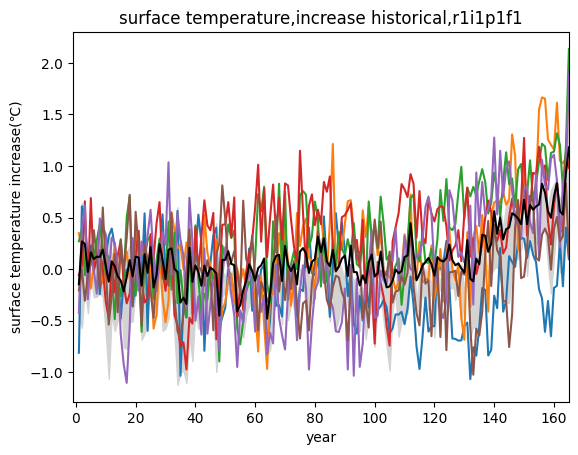

In [13]:
### Import modules
import os
import csv
import math
from netCDF4 import Dataset
import matplotlib.pyplot as plt

### Store file names by model names into directory
model_dict = {}
filenames = sorted(os.listdir()) #場所をcdでseaice_modelにしているからその中のデータを並び替えている。年代順・アンサンブル順にも
print("filenames,", filenames)

##########################アンサンブルを揃えたマルチモデルの場合の変更点###############################
for filename in filenames:
  ensemble="r1i1p1f1" #指定するアンサンブル
  
  if filename.split('_')[4] in ensemble:
    model_name = filename.split('_')[2] #並び替えた文字列をsplitで_の2個目で分割　例)siextentn_SImon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc
    
    print(model_name, end = '\t')
    
    if model_name not in model_dict:    #並び替えた文字列がディクショナリにない場合
      model_dict[model_name] = [filename] #分割されたモデルもいれることができる。keyに対してvalueは複数可能
    else:
      model_dict[model_name].append(filename) #ディクショナリのキーに2個目で分割した文字列を入れる。

print("")
print("model_dict,",model_dict)

############################################################################

### Plot average of sea ice extent every model
counter=0
MMA_ts=[]
# store sea ice extent throughout all the years by models
for model_name, files in model_dict.items(): #ディレクトリ内をループのため、itms method
  sum_surface = []

  for file in files: #ディクショナリのvalueの部分がfileになっているため
    #print(file) データは分かれている。

    ds = Dataset(file, mode='r',format="NETCDF4")
    run_time = len(ds['time']) #timeのもの
    lat = ds['lat'][:]
    lon=  ds['lon'][:]

##################追加コード########################
    ###東京の場合　北緯36度、東経140度
    point_lat=36 
    point_lon=140
    point_lon=point_lon+180
    new_lat=0
    new_lon=0

    for y in range(len(lat)):
      if  lat[y] > (point_lat-2) and lat[y] < (point_lat+2):
        if (point_lat - lat[y])**2 > (point_lat - lat[new_lat])**2 :
          new_lat=new_lat
        else:
          new_lat=y
      # print(new_lat)
    print(lat[new_lat],"!") #北緯35.492958

    for x in range(len(lon)):
      if  lon[x] > (point_lon-1) and lon[x] < (point_lon+1):
          if (point_lon - lon[x])**2 > (point_lon - lon[new_lon])**2 :
            new_lon=new_lon
          else:
            new_lon=x
        #print(lon[x]-180,"$") #東経140
      else:
        pass
    print(lon[new_lon]-180,"!")
        
    for i in range(run_time):
      if len(ds['ts'].dimensions) > 1: #dsのdimensionが1つ以上
        sum_surface.append(ds["ts"][i][new_lat][new_lon]-273.15)
        MMA_ts.append(ds['ts'][i][new_lat][new_lon]-273.15)
      else:
        sum_surface.append(ds['ts'][i])
        MMA_ts.append(ds['ts'][i])
##################################################
  counter+=1 #モデルの数を数える
  
  #lists & variables
  tp_increase_map = []
  year_map = []
  count = 0
  sum = 0
  ave = 0
  fif_ave=0
  tp_increase=0
      
  # calculate average of sea ice extent every year
  for i in range(12*50): #12ヶ月✖️50年
    sum += sum_surface[i]
    count += 1

    if count % 12 == 0:
      ave += sum / 12
      #print(ave)
      sum = 0

  #print(ave)
  fif_ave=ave/50 #50年間の平均気温
  #print(fif_ave)
  ave = 0
  count = 0

  for i in range(len(sum_surface)):
    sum += sum_surface[i]
    count += 1
      
    if count % 12 == 0:
      ave = sum / 12
      tp_increase = ave - fif_ave
      tp_increase_map.append(tp_increase)
      
      sum = 0
      
  for i in range(len(tp_increase_map)):
    year_map.append(i+1)

  #plt.figure(figsize=(6, 6)
  plt.plot(year_map,tp_increase_map)

###################### average ######################
MMA_map = []
SL_1_map = []
SL_2_map = []
year_map = []
count = 0
sum = 0
ave = 0
MMA_increase=0
mon_average=[]
result=0
fif_ave=0
dispersion=0
SD=0
SL_1=[]
SL_2=[]
SL_1_increase=0
SL_2_increase=0

for i in range(1980):
   for x in range(counter):
   #MMA_siextenth[0+1980*0]+MMA_siextenth[0+1980*1]+MMA_siextenth[0+1980+1980] 
     result += MMA_ts[i+1980*x]
   
   mon_average.append(result/counter)
   result=0

   for x in range(counter):
     dispersion += (mon_average[i] - MMA_ts[i+1980*x])**2
     
   SD = math.sqrt(dispersion/counter)
   #print(dispersion)

   SL_1.append(mon_average[i] + (SD*2))
   SL_2.append(mon_average[i] - (SD*2))
   dispersion=0


#######平均のグラフ#############
# calculate average of sea ice extent every year
for i in range(12*50): #12ヶ月✖️50年
  sum += mon_average[i]
  count += 1

  if count % 12 == 0:
    ave += sum / 12
    #print(ave)
    sum = 0

#print(ave)
fif_ave=ave/50 #50年間の平均気温
#print(fif_ave)
ave = 0
count = 0

for i in range(len(mon_average)):
  sum += mon_average[i]
  count += 1
    
  if count % 12 == 0:
    ave = sum / 12
    MMA_increase = ave - fif_ave
    MMA_map.append(MMA_increase)
    sum = 0

fif_ave=0
ave = 0
count = 0

########有意水準+のグラフ########
for i in range(12*50): #12ヶ月✖️50年
  sum += SL_1[i]
  count += 1

  if count % 12 == 0:
    ave += sum / 12
    #print(ave)
    sum = 0

#print(ave)
fif_ave=ave/50 #50年間の平均気温
#print(fif_ave)
ave = 0
count = 0

for i in range(len(mon_average)):
  sum += SL_1[i]
  count += 1
    
  if count % 12 == 0:
    ave = sum / 12
    SL_1_increase = ave - fif_ave
    SL_1_map.append(SL_1_increase)
    sum = 0

########有意水準-のグラフ########
for i in range(12*50): #12ヶ月✖️50年
  sum += SL_2[i]
  count += 1

  if count % 12 == 0:
    ave += sum / 12
    #print(ave)
    sum = 0

#print(ave)
fif_ave=ave/50 #50年間の平均気温
#print(fif_ave)
ave = 0
count = 0

for i in range(len(mon_average)):
  sum += SL_2[i]
  count += 1
    
  if count % 12 == 0:
    ave = sum / 12
    SL_2_increase = ave - fif_ave
    SL_2_map.append(SL_2_increase)
    sum = 0


for i in range(len(SL_1_map)):
  year_map.append(i+1)

plt.plot(year_map,MMA_map, color= 'black')
plt.fill_between(year_map, SL_1_map, SL_2_map, color="lightgray")
#plt.ylim(9.0,15.5)

plt.xlim(-1,165)
plt.ylabel('surface temperature increase(℃)')
plt.title(f'surface temperature,increase historical,{ensemble}') 
plt.xlabel('year')
plt.show() 